TABLE OF CONTENTS

1. Using yfinance to extract Tesla Stock Data
2. Using webscrapping to extract Tesla Revenue Data
3. Using yfinance to extract GameStop Stock Data
4. Using webscrapping to extract GameStop Revenue Data

In [3]:
import yfinance as yf
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import requests
import html5lib

Using yfinace library to exxtract stock data Tesla data

In [4]:
tesla = yf.Ticker("TSLA")

Extracting the share price of Tesla

In [6]:
tesla_share_price_data = tesla.history(period="max")

display the first five rows of the tesla_data dataframe using the head function. 

In [7]:
tesla_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [8]:
tesla_share_price_data.reset_index(inplace=True)

Plotting the Open price against the Date

<AxesSubplot:xlabel='Date'>

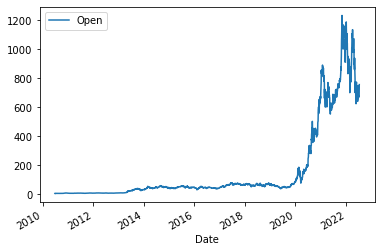

In [9]:
tesla_share_price_data.plot(x="Date", y="Open")

Extracting Tesla Revenue data

In [11]:
response = requests.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01").content


In [12]:
soup = BeautifulSoup(response, "html5lib")


Use Webscraping to Extract Tesla Revenue Data
Display the last five rows of the tesla quarterly revenue dataframe using the tail function.

In [17]:
# Using beautiful soup extract the table with Tesla Quarterly Revenue.
# creating new dataframe
tsla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tables = soup.find_all('table')
table_index=0

for index, table in enumerate(tables):
    if ('Tesla Annual Revenue'in str(table)):
        table_index=index
        
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col!=[]):
        date =col[0].text
        # to remove comma and dollar sign
        revenue =col[1].text.replace("$", "").replace(",", "")
        tsla_revenue=tsla_revenue.append({'Date':date,'Revenue':revenue},
                                           ignore_index=True)

# displaying dataframe
tsla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


Using yfinane tpo extract GME data

In [21]:
gme = yf.Ticker("GME")


In [24]:
gme_data = gme.history(period="max")


display the first five rows of the gme_data dataframe using the head function. 

In [25]:
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2002-02-15,6.733002,6.749834,6.632007,6.699337,2097400,0.0,0.0
2002-02-19,6.665670,6.665670,6.312188,6.430016,1852600,0.0,0.0
2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


Use Webscraping to Extract GMEannual Revenue Data. Display the last five rows of the gme_revenue dataframe using the tail function.

In [26]:
response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text


In [32]:
soup = BeautifulSoup(response, "html5lib")


In [31]:
# Using beautiful soup extract the table with Tesla Quarterly Revenue.
# creating new dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Game Stop Annual Revenue"])

tables = soup.find_all('table')
table_index=0

for index, table in enumerate(tables):
    if ('Game Stop Annual Revenue'in str(table)):
        table_index=index
        
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col!=[]):
        date =col[0].text
        # to remove comma and dollar sign
        revenue =col[1].text.replace("$", "").replace(",", "")
        gme_revenue=gme_revenue.append({'Date':date,'Game Stop Annual Revenue':revenue},
                                           ignore_index=True)

# displaying dataframe
gme_revenue.tail()

,Date,Game Stop Annual Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843
